In [1]:
""" Importing libraries """

from ovito.io import *
from ovito.modifiers import *
import numpy as np
import matplotlib.pyplot as plt

In [9]:
""" Define binning variables """
# Number of horizontal and vertical bins
M_scan = 99
M_minbin = 2
M_maxbin = 100
Nx_vec = np.linspace(M_minbin,M_maxbin,M_scan,dtype=int)
Ny_vec = np.linspace(M_minbin,M_maxbin,M_scan,dtype=int)
# Minimum z coordinate
z_inf = 0

In [10]:
""" Loading input file into an Ovito pipeline """

pipeline_wetting = import_file("wetting.dump")

# Any frame should work, given that is solid
data = pipeline_wetting.compute()

# Simulation cell
Lx = data.cell[0,0]
Ly = data.cell[1,1]
Lz = data.cell[2,2]

# coordinates of the solid surface:
coord_sub = data.particles.positions[data.particles['v_dummymol'] == 2]
coord_sub = coord_sub[...]

In [11]:
""" Arrays for storage """
z_mean = np.zeros(M_scan)
z_rmsd = np.zeros(M_scan)
z_max = np.zeros(M_scan)
z_min = np.zeros(M_scan)
hh = np.zeros(M_scan)

In [12]:
for k in range(len(Nx_vec)) :
    
    Nx = Nx_vec[k]
    Ny = Ny_vec[k]
    z_peaks = z_inf*np.ones((Nx,Ny))

    hx = Lx/Nx
    hy = Ly/Ny

    x = np.linspace(0.5*hx,Lx-0.5*hx,Nx)
    y = np.linspace(0.5*hy,Ly-0.5*hy,Ny)
    Xg, Yg = np.meshgrid(x, y, indexing='xy')
    
    for pc in coord_sub :
        ix = int(pc[0]/hx)
        jy = int(pc[1]/hy)
        z = pc[2]
        if z_peaks[ix,jy] < z :
            z_peaks[ix,jy] = z
    
    z_rmsd[k] = np.std(z_peaks)
    z_mean[k] = np.mean(z_peaks)
    z_max[k] = np.max(z_peaks)
    z_min[k] = np.min(z_peaks)
    hh[k] = hx*hy
    
    # print("---------------")
    # print("hx = ",hx," [A]")
    # print("hy = ",hy," [A]")
    # print("max peak =",z_max[k]," [A]")
    # print("min peak =",z_min[k]," [A]")
    # print("RMSD =",z_rmsd[k]," [A]")

## Plotting

<IPython.core.display.Javascript object>


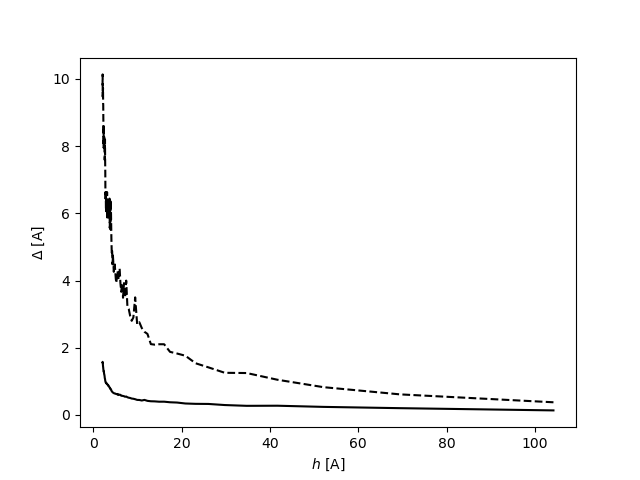

In [16]:
""" RMSD vs. bin size """
%matplotlib notebook
plt.plot(np.sqrt(hh),z_rmsd,'k-')
plt.plot(np.sqrt(hh),z_max-z_min,'k--')
plt.xlabel(r'$h$ [A]')
plt.ylabel(r'$\Delta$ [A]')
plt.show()

<IPython.core.display.Javascript object>


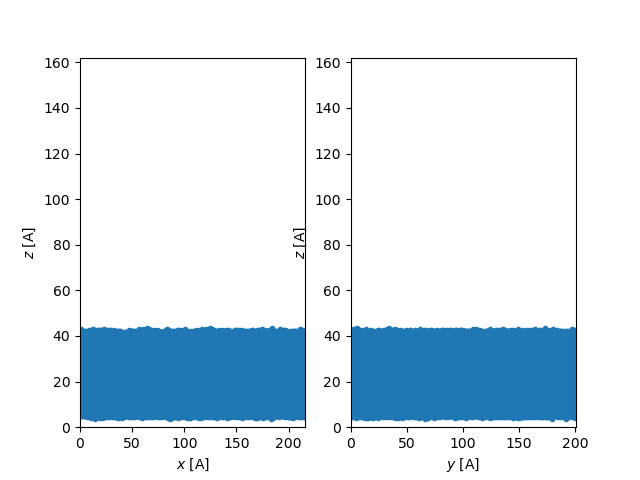

In [16]:
""" 2D scatterplot """
%matplotlib notebook
fig, (ax1,ax2) = plt.subplots(1,2)
ax1.scatter(coord_sub[:,0],coord_sub[:,2],marker='.')
ax1.set_xlim([0,Lx])
ax1.set_ylim([0,Lz])
ax1.set_xlabel(r'$x$ [A]')
ax1.set_ylabel(r'$z$ [A]')
ax1.tick_params(axis='both')
ax2.scatter(coord_sub[:,1],coord_sub[:,2],marker='.')
ax2.set_xlim([0,Ly])
ax2.set_ylim([0,Lz])
ax2.set_xlabel(r'$y$ [A]')
ax2.set_ylabel(r'$z$ [A]')
ax2.tick_params(axis='both')
plt.show()

<IPython.core.display.Javascript object>


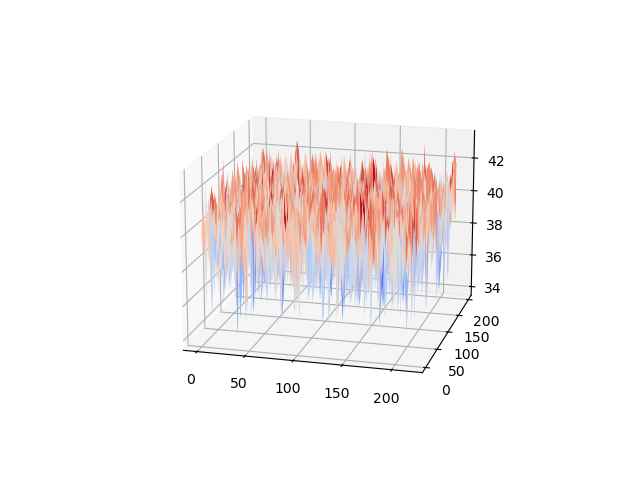

In [24]:
""" 3D surface plot """
%matplotlib notebook
from matplotlib import cm
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(Xg, Yg, z_peaks, cmap=cm.coolwarm, linewidth=0)
plt.show()